this is tha data about the  salary of the cyber securirty 
in this  i have done some sort of a analysis process on that data step by step and at last of that colunns i am also going to write about the conclusion of that data analysis 


In [1]:
# importing the libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("Cyber_salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M
5,2022,MI,FT,Penetration Testing Engineer,40000,EUR,42801,CY,100,CY,L
6,2022,SE,FT,Security Analyst,136600,USD,136600,US,100,US,M
7,2022,SE,FT,Security Analyst,109280,USD,109280,US,100,US,M
8,2022,SE,FT,Security Engineer,211600,USD,211600,US,100,US,M
9,2022,SE,FT,Security Engineer,182160,USD,182160,US,100,US,M


In [4]:
#Working Year	The year the salary was paid

#Job Title	The role worked in during the year
#Experience Level	The experience level in the job during the year. [ EN - Entry level / Junior, MI - Mid level / Intermediate, SE - Senior level / Expert, EX - Executive level / Director ]
#Job status	The type of employment for the role. [ PT - Part time, FT - Full time, CT - Contract, FL - Freelance ]
#Salary	The total gross salary amount paid.
#Salary Currency	The currency of the salary paid as an ISO 4217 currency code.
#Salary in usd	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
#Employee Location	Employee's primary country of residence in during the work year as an ISO 3166 country code.( PFB Link to ISO 3166 country code )
#Company Location	The country of the employer's main office or contracting branch.
#Company Size	The median number of people that worked for the company during the year. [ S(small) - Less than 50 employees , M(medium) - 50 to 250 employees , L(large) - More than 250 employees ]
#Remote Working Ratio	The overall amount of work done remotely. [ 0 - No Remote Work (less than 20%), 50 - Partially Remote, 100 - Fully Remote (more than 80%) ]

#  Lets find about the number of rows and columns are present in our data set

In [5]:
print("number of rows - " ,df.shape[1])
print("number of columns - " ,df.shape[0])

number of rows -  11
number of columns -  1349


In [6]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S


As we see in our dataset that the salary has the three columns one was denoting the salary  , other was denoting its currency and the final one was denoting the salary in single currency. As the pespective of the data analysis 
we can remove the salary and salary_currenccy columns and keep the salary_in_usd columns because in that columns the salary was in single currency 

# Lets remove salary and salary_currency columns 

In [7]:
df=df.drop(['salary', 'salary_currency'], axis=1)

In [8]:
df.columns 

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [9]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,72762,DE,100,DE,S


# Lets find out about the null value 

In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
# so we found that the data have no null value 

# check data type of each columns 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary_in_usd       1349 non-null   int64 
 5   employee_residence  1349 non-null   object
 6   remote_ratio        1349 non-null   int64 
 7   company_location    1349 non-null   object
 8   company_size        1349 non-null   object
dtypes: int64(3), object(6)
memory usage: 95.0+ KB


# Which department have the maximum salary 

In [13]:
df['salary_in_usd'].max()

899920

In [14]:
df[df['salary_in_usd']==899920]['job_title']

614    Detection Engineer
Name: job_title, dtype: object

In [15]:
# Which department have the minimum salary 

In [16]:
df['salary_in_usd'].min()

2000

In [17]:
df[df['salary_in_usd']==2000]['job_title']

539                Penetration Tester
1063    Application Security Engineer
Name: job_title, dtype: object

# Find out the full detail of the position who have maximum salary 

In [18]:
df.nlargest(1, ['salary_in_usd'])

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
614,2022,SE,FT,Detection Engineer,899920,GB,100,GB,L


# Find out which employment_type has highest salary 

In [19]:
df['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

[Text(0.5, 1.0, 'Salary according to employment type ')]

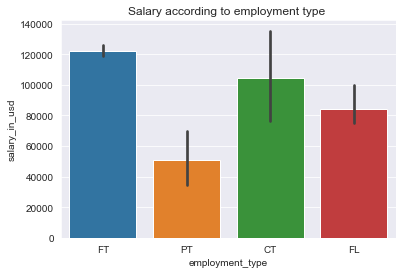

In [20]:
sns.set_style('darkgrid')
sns.barplot(x='employment_type' , y='salary_in_usd' , data = df ).set(title = "Salary according to employment type ")

In [21]:
# conclusion of that bargraph is highest salary are provided in FT type employment and lowest in PT 

In [22]:
#find out the in which year highest salary is paid to the employee 

[Text(0.5, 1.0, 'Salary according to employment type ')]

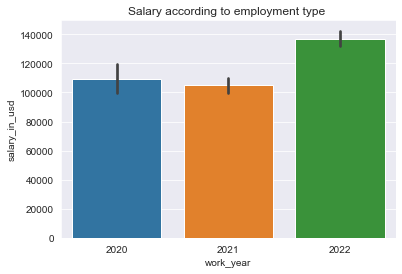

In [23]:
sns.set_style('darkgrid')
sns.barplot(x='work_year' , y='salary_in_usd' , data = df ).set(title = "Salary according to employment type ")

Conclusion:- In 2022 the highest amount of salary is paid to the employee and there was slight diffrence between year 2020 to 2021

In [24]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,72762,DE,100,DE,S


# Find out which type of experince_level had less salary and which has maximum salary 

In [25]:
df['experience_level'].unique()

array(['EN', 'SE', 'MI', 'EX'], dtype=object)

 [ EN - Entry level / Junior, MI - Mid level / Intermediate, SE - Senior level / Expert, EX - Executive level / Director ]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'EN'), Text(1, 0, 'SE'), Text(2, 0, 'MI'), Text(3, 0, 'EX')])

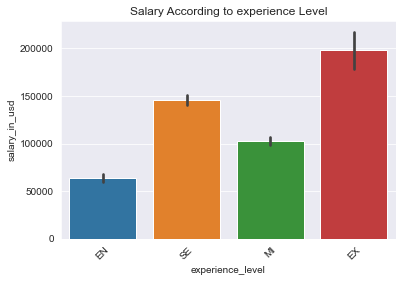

In [26]:
sns.set_style("darkgrid")

sns.barplot(x="experience_level" , y="salary_in_usd" , data=df ).set(title="Salary According to experience Level")
plt.xticks(rotation=45)

conclusion:- Ex level has highest salary 
EN level has lowest salary 


# Where is the highest and lowest paying company is located ?

In [27]:
df[df['salary_in_usd']==899920]['company_location']

614    GB
Name: company_location, dtype: object

In [28]:
df[df['salary_in_usd']==2000]['company_location']

539     RO
1063    VN
Name: company_location, dtype: object

The higest paying company was located in GB=United Kingdom of Great Britain and Northern Ireland and there are two lowest
paying company one  was located in RO=Romania and another was located in VN=Vietnam


In [29]:
# what is the average salary 

In [30]:
df['salary_in_usd'].describe()

count      1349.000000
mean     121578.622683
std       68972.954838
min        2000.000000
25%       75000.000000
50%      115000.000000
75%      152000.000000
max      899920.000000
Name: salary_in_usd, dtype: float64

In [31]:
df[df['salary_in_usd']==115000].count()

work_year             12
experience_level      12
employment_type       12
job_title             12
salary_in_usd         12
employee_residence    12
remote_ratio          12
company_location      12
company_size          12
dtype: int64

In [32]:
# there are total 12 company which are paying the salary 115000

# Find out the total number of employe which are getting  salary between 2000 to 115000

In [33]:
# now we are using between method 
df[df['salary_in_usd'].between(2000 , 115000)].count()

work_year             681
experience_level      681
employment_type       681
job_title             681
salary_in_usd         681
employee_residence    681
remote_ratio          681
company_location      681
company_size          681
dtype: int64

# so there are 681 employee which are getting the salary between 2000 to 115000

# Find the total number of employee which are getting the salary less than 2000 and their job title 

In [34]:
df[df['salary_in_usd'].between(0,2000)]['job_title']

539                Penetration Tester
1063    Application Security Engineer
Name: job_title, dtype: object

so there are two employee and their job title are Penetration Tester and Application Security Engineer

In [35]:
df.columns 

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [36]:
# what are salary distribution among the remote_ratio

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '50'), Text(2, 0, '100')])

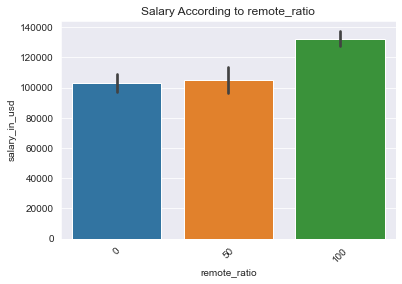

In [37]:
sns.set_style("darkgrid")

sns.barplot(x="remote_ratio" , y="salary_in_usd" , data=df ).set(title="Salary According to remote_ratio")
plt.xticks(rotation=45)

0 - No Remote Work (less than 20%), 50 - Partially Remote, 100 - Fully Remote (more than 80%)
those who have fully remote acess are getting more salary and  there are less difference between parial remote and no remote work employee 

# Which type of company was paying maximum salary 

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'M'), Text(2, 0, 'L')])

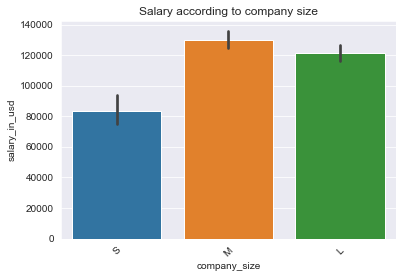

In [38]:
sns.set_style("darkgrid")
sns.barplot(x="company_size" , y="salary_in_usd" ,  data=df).set(title ="Salary according to company size")
plt.xticks(rotation=45)

The medium size company was paying more salary as compared to large and size company

# Find the total number of employe who lived in US 

In [39]:
df['employee_residence'].unique()

array(['DE', 'US', 'CY', 'BA', 'GB', 'CA', 'IN', 'FR', 'ES', 'BR', 'BW',
       'TW', 'NL', 'AE', 'CH', 'DK', 'CL', 'SG', 'AU', 'IT', 'PK', 'GR',
       'GH', 'AZ', 'RO', 'AR', 'DZ', 'AF', 'SI', 'HR', 'SE', 'HU', 'ET',
       'MX', 'IL', 'IE', 'PL', 'CR', 'JP', 'PT', 'NG', 'NO', 'CZ', 'ID',
       'EE', 'KG', 'KE', 'BG', 'IR', 'NZ', 'BE', 'ZA', 'AT', 'LU', 'EG',
       'VN', 'SA', 'LT', 'RU', 'TR'], dtype=object)

In [40]:
df[df['employee_residence']=='US'].count()

work_year             940
experience_level      940
employment_type       940
job_title             940
salary_in_usd         940
employee_residence    940
remote_ratio          940
company_location      940
company_size          940
dtype: int64

So there are 940 employee who lived in US 

# Find the total number of commpany which was located in GB and US

In [41]:
df[df['company_location']=="GB"].count()

work_year             61
experience_level      61
employment_type       61
job_title             61
salary_in_usd         61
employee_residence    61
remote_ratio          61
company_location      61
company_size          61
dtype: int64

In [42]:
df[df['company_location']=='US'].count()

work_year             965
experience_level      965
employment_type       965
job_title             965
salary_in_usd         965
employee_residence    965
remote_ratio          965
company_location      965
company_size          965
dtype: int64

there are total 61 company which are in GB and 965 company which are in US

# Find the total number of small , large and medium company 

In [43]:
df[df['company_size']=="S"].count()

work_year             92
experience_level      92
employment_type       92
job_title             92
salary_in_usd         92
employee_residence    92
remote_ratio          92
company_location      92
company_size          92
dtype: int64

In [44]:
df[df['company_size']=="M"].count()

work_year             459
experience_level      459
employment_type       459
job_title             459
salary_in_usd         459
employee_residence    459
remote_ratio          459
company_location      459
company_size          459
dtype: int64

In [45]:
df[df['company_size']=="L"].count()

work_year             798
experience_level      798
employment_type       798
job_title             798
salary_in_usd         798
employee_residence    798
remote_ratio          798
company_location      798
company_size          798
dtype: int64

So there are 798 Large  , 459 Medium , and 92 Small company are in our data set

In [46]:
# so i have perform some data analysis process by creating some question on that dataset by my own and i hope i have done everything right and if 
# i have done anything wrong please let me know 